In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [24]:
df = pd.read_csv('DB_MidtermSampleData_Mar21.csv')
df

,company,sector,month,job_category,region,gender,count,inflow,outflow
0,SAP SE,Information Technology,2013-10,technician,South America,female,50.711959,4.849139e-01,1.406462e+00
1,Wells Fargo & Company,Financials,2013-10,technician,Pacific Islands,female,1.819455,6.467172e-07,6.981965e-07
2,MICROSOFT CORPORATION,Information Technology,2013-10,scientist,Northern America,male,1541.799779,3.127633e+01,2.168564e+01
3,DXC Technology Co,Information Technology,2013-10,sales,Western Europe,female,62.103364,3.428746e+00,4.043797e-03
4,United Technologies Corporation,Industrials,2013-10,administrative,Western Europe,male,77.189915,4.131975e-05,1.567777e-03
...,...,...,...,...,...,...,...,...,...
2379029,International Business Machines Corporation,Information Technology,2015-09,empty,Northern Europe,male,981.675002,3.283342e+01,2.577147e+01
2379030,IQVIA,Information Technology,2018-07,empty,South-Eastern Asia,male,47.651149,1.246570e+00,5.287461e-01
2379031,"Delta Air Lines, Inc.",Industrials,2016-10,administrative,Northern Africa,female,0.000000,0.000000e+00,0.000000e+00
2379032,"HCA Healthcare, Inc.",Health Care,2017-05,empty,Northern Europe,male,19.443301,6.653489e-01,5.603069e-01


In [25]:
# Treat 'empty' fields as NaN
df = df.replace('empty',np.NaN)

In [26]:
df['company'].value_counts().index

Index(['General Electric Company', 'Intel Corporation', 'PepsiCo, Inc.',
       'Amazon.com, Inc.', 'Johnson & Johnson', 'Alphabet Inc.',
       'Verizon Communications Inc.',
       'International Business Machines Corporation', 'Walmart Inc',
       'Procter & Gamble Co', 'Coca-Cola Company', 'JPMorgan Chase',
       'Hewlett Packard Enterprise Company', 'MICROSOFT CORPORATION',
       'Siemens AG', 'Omnicom Group Inc', 'ABB Ltd', 'Walt Disney Company',
       'Honeywell International Inc', 'CVS Health Corporation',
       'Morgan Stanley', 'Unilever NV', 'Orange SA', 'Vodafone Group PLC',
       'Dell Technologies Inc', 'Volkswagen AG', 'Accenture PLC', 'AT&T',
       'Tata Group', 'Facebook Inc', 'Novartis AG', 'Nestle SA',
       'Barclays PLC', 'GENERAL MOTORS COMPANY', 'Oracle Corporation',
       'Ford Motor Company', 'Pfizer Inc', 'Apple, Inc.', 'Infosys Ltd',
       'Aon PLC', 'Citigroup Inc', 'United Technologies Corporation',
       'Abbott Laboratories', 'Roche Holding AG'

In [30]:
# Check variable types
df.dtypes

company          object
sector           object
month            object
job_category     object
region           object
gender           object
count           float64
inflow          float64
outflow         float64
dtype: object

In [9]:
# Pull JPMorgan Chase Data
jpm = df.loc[df['company']=='JPMorgan Chase',:]
jpm

,company,sector,month,job_category,region,gender,count,inflow,outflow
13,JPMorgan Chase,Financials,2013-10,scientist,Eastern Europe,female,6.799755,2.400250e-06,2.502501e-06
17,JPMorgan Chase,Financials,2013-10,marketing,South America,male,32.488539,7.142222e-03,1.892068e-05
28,JPMorgan Chase,Financials,2013-10,marketing,Pacific Islands,male,11.323029,9.124646e-06,1.169514e-05
39,JPMorgan Chase,Financials,2013-10,engineer,NaN,male,35.085272,4.450154e-05,9.992722e-06
71,JPMorgan Chase,Financials,2013-10,marketing,Eastern Europe,female,12.106039,4.269094e-06,4.450959e-06
...,...,...,...,...,...,...,...,...,...
2378394,JPMorgan Chase,Financials,2016-01,scientist,NaN,female,0.008061,5.155334e-08,4.368265e-08
2378535,JPMorgan Chase,Financials,2020-11,NaN,Eastern Asia,male,283.876440,6.845427e+00,7.775211e+00
2378610,JPMorgan Chase,Financials,2018-12,NaN,Northern Africa,male,10.482928,1.721385e-03,2.271828e-03
2379001,JPMorgan Chase,Financials,2018-01,NaN,South-Eastern Asia,male,347.348662,1.019414e+01,8.967659e+00


In [146]:
# How many employees does JPM have?
jpm.loc[jpm['month']==jpm['month'].max(),'count'].sum()

355376.75980739977

In [148]:
# How many males?
jpm.loc[(jpm['month']==jpm['month'].max()) & (jpm['gender']=='male'),'count'].sum()

189825.0198014736

In [149]:
# How many females?
jpm.loc[(jpm['month']==jpm['month'].max()) & (jpm['gender']=='female'),'count'].sum()

165551.74000592617

In [151]:
# What positions do JPM employees fulfill? Need to sum by 'job_category'
jpm2 = jpm.loc[jpm['month']==jpm['month'].max(),:]
jpm2 = jpm2.groupby(['job_category','gender']).agg({'count':'sum'})
jpm2 = jpm2.reset_index()

# Split the data into two groups by gender
male = jpm2.loc[jpm2['gender']=='male',:].set_index('job_category')
female = jpm2.loc[jpm2['gender']=='female',:].set_index('job_category')
female

,gender,count
job_category,,
administrative,female,3443.891254
engineer,female,22163.713038
finance,female,75417.090952
management,female,33637.335914
marketing,female,3067.465109
sales,female,18495.921035
scientist,female,1421.148948
technician,female,1579.760300


In [153]:
# Pull Financials Sector data and Remove JPM from this data to compare rest of sector to JPM
fin_sector = df.loc[(df['sector']=='Financials') & (df['company']!='JPMorgan Chase') & (df['month']==df['month'].max()),:]
fin_sector

,company,sector,month,job_category,region,gender,count,inflow,outflow
570189,Barclays PLC,Financials,2021-01,finance,Pacific Islands,female,32.988317,0.175523,0.363356
570191,Wells Fargo & Company,Financials,2021-01,sales,Northern Africa,male,3.004012,0.020337,0.020185
570202,Bank of America Corporation,Financials,2021-01,marketing,Pacific Islands,male,3.757169,0.024465,0.020199
570209,Bank of America Corporation,Financials,2021-01,scientist,Eastern Europe,female,1.260075,0.008154,0.006732
570210,Wells Fargo & Company,Financials,2021-01,technician,Western Europe,male,9.728342,0.066177,0.065683
...,...,...,...,...,...,...,...,...,...
2373772,Wells Fargo & Company,Financials,2021-01,NaN,Northern Africa,female,0.846120,0.005708,0.005665
2373777,Barclays PLC,Financials,2021-01,NaN,Pacific Islands,male,1.751911,0.013595,0.014205
2373811,Morgan Stanley,Financials,2021-01,NaN,Eastern Europe,male,145.940526,7.894667,5.965723
2377205,Bank of America Corporation,Financials,2021-01,NaN,Southern Asia,female,261.090589,4.577417,3.490916


In [154]:
fin = fin_sector.groupby(['job_category','gender']).agg({'count':'sum'})
fin = fin.reset_index()

# Split the data into two groups by gender
male_fin = fin.loc[jpm2['gender']=='male',:].set_index('job_category')
female_fin = fin.loc[jpm2['gender']=='female',:].set_index('job_category')
female_fin

,gender,count
job_category,,
administrative,female,18155.742824
engineer,female,96189.635316
finance,female,372711.698118
management,female,154932.536687
marketing,female,15116.420350
sales,female,58085.295977
scientist,female,4712.008500
technician,female,7669.042767


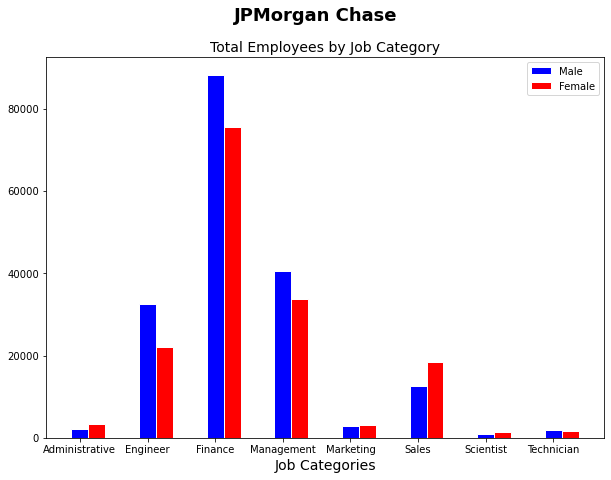

In [155]:
fig,ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(10,7))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = male['count']
bars2 = female['count']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Female')

plt.suptitle('JPMorgan Chase',size=18,fontweight='bold')
plt.title('Total Employees by Job Category',size=14)
plt.xlabel('Job Categories',size=14)
plt.xticks([0,1,2,3,4,5,6,7],male.index.str.capitalize(),size=10)

# Create legend & Show graphic
plt.legend()
plt.show()

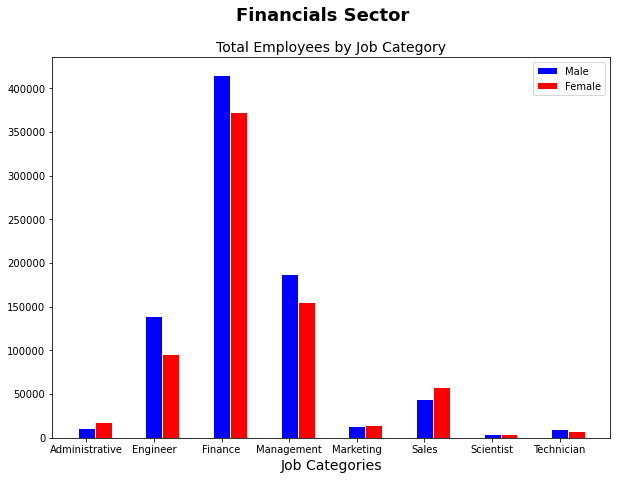

In [156]:
fig,ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(10,7))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = male_fin['count']
bars2 = female_fin['count']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Female')

plt.suptitle('Financials Sector',size=18,fontweight='bold')
plt.title('Total Employees by Job Category',size=14)
plt.xlabel('Job Categories',size=14)
plt.xticks([0,1,2,3,4,5,6,7],male.index.str.capitalize(),size=10)

# Create legend & Show graphic
plt.legend()
plt.show()

In [315]:
# JPMorgan Chase Hiring Over Time
jpm_all = df.loc[df['company']=='JPMorgan Chase',:]
jpm_month = jpm_all.groupby(['month','gender'])[['count']].sum().reset_index()
jpm_month

# Find spread between % of employees as male vs female
jpm_month['percentage'] = 0
jpm_month['spread'] = 0      # Difference between % male and % female (spread = 0 if split is 50/50)
for i in range(len(jpm_month)):
    jpm_month.loc[i,'percentage'] = jpm_month.loc[i,'count']/jpm_month.loc[jpm_month['month']==jpm_month.loc[i,'month'],'count'].sum()
    jpm_month.loc[i,'spread'] = jpm_month.loc[i,'percentage']-(1-jpm_month.loc[i,'percentage'])
jpm_month


,month,gender,count,percentage,spread
0,2012-01,female,143810.005052,0.475781,-0.048438
1,2012-01,male,158450.977323,0.524219,0.048438
2,2012-02,female,141569.516237,0.475774,-0.048452
3,2012-02,male,155986.575433,0.524226,0.048452
4,2012-03,female,141751.290693,0.475670,-0.048661
...,...,...,...,...,...
213,2020-11,male,189197.498048,0.534607,0.069215
214,2020-12,female,163621.076052,0.465872,-0.068256
215,2020-12,male,187593.623018,0.534128,0.068256
216,2021-01,female,165551.740006,0.465849,-0.068303


In [316]:
male = jpm_month.loc[jpm_month['gender']=='male',:]
female = jpm_month.loc[jpm_month['gender']=='female',:]
female

,month,gender,count,percentage,spread
0,2012-01,female,143810.005052,0.475781,-0.048438
2,2012-02,female,141569.516237,0.475774,-0.048452
4,2012-03,female,141751.290693,0.475670,-0.048661
6,2012-04,female,142230.119441,0.475806,-0.048387
8,2012-05,female,142680.477377,0.475735,-0.048530
...,...,...,...,...,...
208,2020-09,female,165434.474167,0.464456,-0.071087
210,2020-10,female,165188.901420,0.465045,-0.069910
212,2020-11,female,164702.425141,0.465393,-0.069215
214,2020-12,female,163621.076052,0.465872,-0.068256


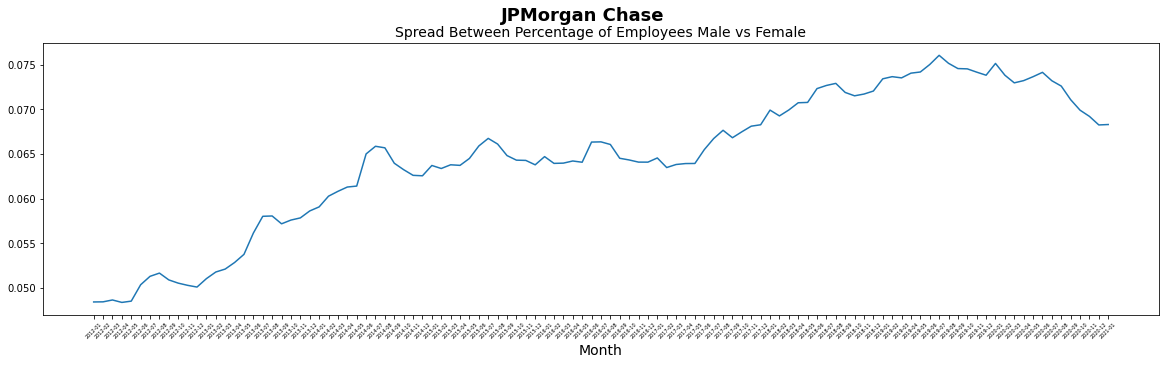

In [318]:
fig,ax = plt.subplots(figsize=(20,5))
x=male['spread']
x.plot.line(ax=ax)

plt.suptitle('JPMorgan Chase',size=18,fontweight='bold')
plt.title('Spread Between Percentage of Employees Male vs Female',size=14)
plt.xlabel('Month',size=14)

plt.xticks(male.index,male['month'],size=5,rotation=45)

plt.show()

In [297]:
# JPMorgan Chase Hiring Over Time
jpm_all = df.loc[df['company']=='JPMorgan Chase',:]
jpm_split = jpm_all.groupby(['month','gender','job_category'])[['count']].sum().reset_index()
jpm_split

# Find spread between % of employees as male vs female
jpm_split['percentage'] = 0
jpm_split['spread'] = 0      # Difference between % male and % female (spread = 0 if split is 50/50)
jpm_split['end'] = 0         # Difference between beginning spread and ending spread (indicate whether one gender gained more ground than the other)
for i in range(len(jpm_month)):
    jpm_split.loc[i,'percentage'] = jpm_split.loc[i,'count']/jpm_split.loc[(jpm_split['month']==jpm_split.loc[i,'month']) & (jpm_split['job_category']==jpm_split.loc[i,'job_category']),'count'].sum()
    jpm_split.loc[i,'spread'] = jpm_split.loc[i,'percentage']-(1-jpm_split.loc[i,'percentage'])
    jpm_split.loc[i,'end'] = float(jpm_split.loc[(jpm_split['month']==jpm_split['month'].max()) & (jpm_split['job_category']==jpm_split.loc[i,'job_category']) & (jpm_split['gender']==jpm_split.loc[i,'gender']),'spread'])-float(jpm_split.loc[(jpm_split['month']==jpm_split['month'].min()) & (jpm_split['job_category']==jpm_split.loc[i,'job_category']) & (jpm_split['gender']==jpm_split.loc[i,'gender']),'spread'])

jpm_split


,month,gender,job_category,count,percentage,spread,end
0,2012-01,female,administrative,2896.741134,0.608499,0.216998,-0.216998
1,2012-01,female,engineer,15819.115407,0.403258,-0.193485,0.193485
2,2012-01,female,finance,70722.384877,0.474994,-0.050013,0.050013
3,2012-01,female,management,27774.273323,0.454848,-0.090304,0.090304
4,2012-01,female,marketing,2244.286971,0.520243,0.040486,-0.040486
...,...,...,...,...,...,...,...
1739,2021-01,male,management,40625.754794,0.547052,0.094104,0.003800
1740,2021-01,male,marketing,2896.994632,0.485709,-0.028581,0.011905
1741,2021-01,male,sales,12674.260265,0.406615,-0.186770,0.023893
1742,2021-01,male,scientist,992.261164,0.411145,-0.177710,0.035263


In [308]:
end = jpm_split.loc[jpm_split['month']==jpm_split['month'].max(),:]
end['job_category'] = end['job_category'].str.capitalize()
end = end.set_index('job_category')
end

<ipython-input-308-f92e38f5e800>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end['job_category'] = end['job_category'].str.capitalize()


,month,gender,count,percentage,spread,end
job_category,,,,,,
Administrative,2021-01,female,3443.891254,0.605311,0.210622,-0.006375
Engineer,2021-01,female,22163.713038,0.404556,-0.190888,0.002597
Finance,2021-01,female,75417.090952,0.461301,-0.077398,-0.027385
Management,2021-01,female,33637.335914,0.452948,-0.094104,-0.003800
Marketing,2021-01,female,3067.465109,0.514291,0.028581,-0.011905
Sales,2021-01,female,18495.921035,0.593385,0.186770,-0.023893
Scientist,2021-01,female,1421.148948,0.588855,0.177710,-0.035263
Technician,2021-01,female,1579.760300,0.440390,-0.119221,-0.005811
Administrative,2021-01,male,2245.565508,0.394689,-0.210622,0.006375


Text(0, 0.5, '')

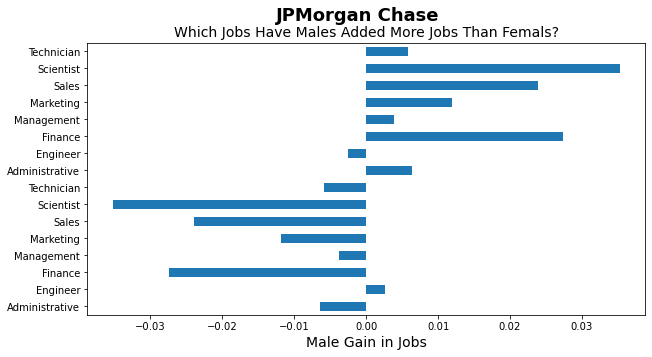

In [311]:
fig,ax = plt.subplots(figsize=(10,5))
end['end'].plot.barh(ax=ax)

plt.suptitle('JPMorgan Chase',size=18,fontweight='bold')
plt.title('Which Jobs Have Males Added More Jobs Than Femals?',size=14)
plt.xlabel('Male Gain in Jobs',size=14)
plt.ylabel('')